In [ ]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

print("Packages imported...")

Packages imported...


In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

asl-alphabet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = '/content/asl_alphabet_train/asl_alphabet_train'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28
            else:
                label = 29
            for image_filename in os.listdir(folder + '/' + folderName):
                img_file = cv2.imread(folder + '/' + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))

                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

<ipython-input-5-c18c5738f422>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.empty((train_len,), dtype=np.int)


Images successfully imported...


In [ ]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 64, 64, 3)
The shape of y_train is :  (87000,)


In [ ]:
print("The shape of one image is : ", X_train[0].shape)

The shape of one image is :  (64, 64, 3)


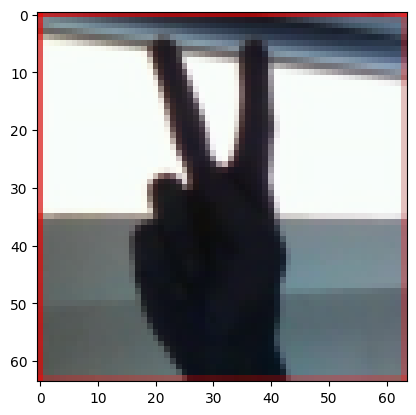

In [ ]:
plt.imshow(X_train[0])
plt.show()

In [ ]:
X_data = X_train
y_data = y_train
print("Copies made...")

Copies made...


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [ ]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)
(60900, 29)
(26100, 29)


In [ ]:
# This is done to save CPU and RAM space while working on Kaggle Kernels. This will delete the specified data and save some space!
import gc
del X_data
del y_data
gc.collect()

0

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

Packages imported...


In [ ]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                   

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_cat_train,
          epochs=10,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/10
952/952 - 453s - loss: 1.0934 - accuracy: 0.6723 - val_loss: 0.2868 - val_accuracy: 0.9092 - 453s/epoch - 476ms/step
Epoch 2/10
952/952 - 481s - loss: 0.1583 - accuracy: 0.9484 - val_loss: 0.1066 - val_accuracy: 0.9659 - 481s/epoch - 505ms/step
Epoch 3/10
952/952 - 481s - loss: 0.0783 - accuracy: 0.9752 - val_loss: 0.1939 - val_accuracy: 0.9477 - 481s/epoch - 505ms/step
Epoch 4/10
952/952 - 475s - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0536 - val_accuracy: 0.9830 - 475s/epoch - 499ms/step
Epoch 5/10
952/952 - 470s - loss: 0.0445 - accuracy: 0.9857 - val_loss: 0.0317 - val_accuracy: 0.9884 - 470s/epoch - 494ms/step
Epoch 6/10
952/952 - 472s - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0407 - val_accuracy: 0.9874 - 472s/epoch - 496ms/step
Epoch 7/10
952/952 - 478s - loss: 0.0374 - accuracy: 0.9888 - val_loss: 0.0476 - val_accuracy: 0.9837 - 478s/epoch - 502ms/step


In [ ]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,1.093370,0.672299,0.286788,0.909157
1,0.158349,0.948424,0.106573,0.965900
2,0.078258,0.975172,0.193878,0.947663
3,0.049385,0.984581,0.053560,0.982988
4,0.044546,0.985665,0.031719,0.988391
5,0.030379,0.990788,0.040670,0.987433
6,0.037448,0.988752,0.047627,0.983716


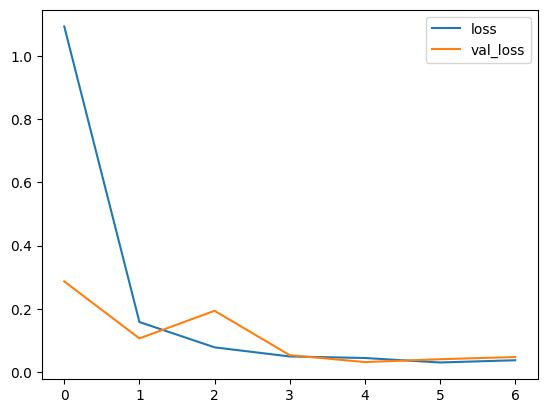

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

In [ ]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.04762706905603409, 0.9837164878845215]

In [ ]:

predictions = model.predict(X_test)
print("Predictions done...")

816/816 [==============================] - 51s 63ms/step
Predictions done...


In [ ]:
print(predictions)

[[2.47299443e-15 9.00875187e-37 4.88014410e-37 ... 2.97706522e-31
  0.00000000e+00 0.00000000e+00]
 [2.82475605e-11 2.41463750e-13 3.19870946e-06 ... 9.99815226e-01
  2.08218977e-14 8.53608029e-09]
 [6.00669155e-05 6.97072480e-08 3.64633598e-22 ... 6.28011196e-18
  6.59798321e-28 2.74841270e-14]
 ...
 [5.36439586e-07 2.56411670e-09 5.22070722e-14 ... 9.13543963e-10
  1.94733818e-17 2.77476317e-08]
 [3.21985674e-08 2.98178787e-10 9.76235449e-17 ... 6.43449053e-14
  1.85970132e-14 7.11963485e-16]
 [9.65894476e-10 2.72212919e-10 3.27400052e-11 ... 1.01599392e-06
  9.99998450e-01 1.11380265e-13]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       900
           1       0.96      0.99      0.98       900
           2       0.99      1.00      1.00       900
           3       0.98      1.00      0.99       900
           4       1.00      0.95      0.97       900
           5       0.99      1.00      1.00       900
           6       0.99      1.00      0.99       900
           7       1.00      1.00      1.00       900
           8       0.98      1.00      0.99       900
           9       1.00      0.99      1.00       900
          10       1.00      0.91      0.95       900
          11       0.99      1.00      1.00       900
          12       0.96      1.00      0.98       900
          13       0.99      0.99      0.99       900
          14       0.99      0.99      0.99       900
          15       0.98      1.00      0.99       900
          16       1.00      0.97      0.99       900
          17       0.92    

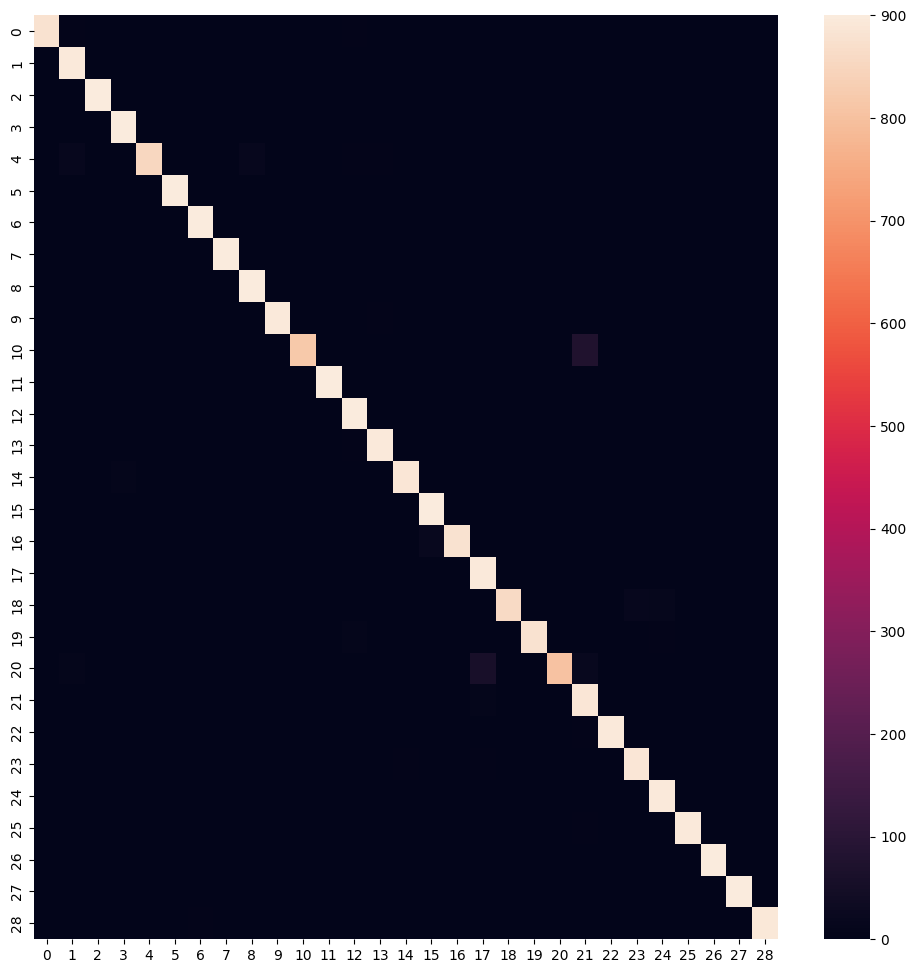

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,predictions.argmax(axis=1)))
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

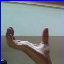

In [ ]:
img = image.load_img('/content/asl_alphabet_test/asl_alphabet_test/space_test.jpg',target_size =(64,64))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
op[pred]

1/1 [==============================] - 0s 24ms/step


'space'

In [ ]:
model.save('final-asl.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
